#__PRACTICAL SESSION 1__ Unsupervised & Supervised ML#

The dataset is the [_MIT-BIH Arrhythmia database_](https://physionet.org/content/mitdb/1.0.0/) composed of 10,000 [electrocardiograms (__ECG__)](https://en.wikipedia.org/wiki/Electrocardiography). Each ECG has 180 time samples and corresponds to a normal heart beat or 4 specific heart problem. Thus, we have 5 labels:

1.   'A': Atrial premature beat
2.   'L': Left bundle branch block beat
3.   'N': Normal beat
4.   'R': Right bundle branch block beat
5.   'V': Premature ventricular contraction

Data are available on eCAMPUS:


*   __X_tp1.npy__: a 10000x180 numpy matrix
*   __Y_tp1.npy__: a 10000 numpy vector with the associated labels (encoded by one character 'A', 'L', ...)

Download the dataset and put the numpy files into a '__/data__' directory.

First part is dedicated to UNSUPERVISED LEARNING with Principal Component Analysis (PCA) and Clustering (K-Means).

Second part is SUPERVISED LEARNING with _Logistic Regression_, _Naive Bayes Classifier_ and _Support Vector Machine_.

The goal of this practical session is to experiment! Everything you need is easily available in the SKLEARN documentation that contains many, many examples.  

#BONUS STRIKE 🎳

You can make additional experiences. In that case, please add bonus works at the end of your notebook in the __[BONUS]__ section.

Bonus works could bring bonus points on the global note for the practical sessions **_if and only if_** all the mandatory jobs have been done correctly.

#How this Jupyter Notebook works?

*   Questions and things to do are marked as __[QUESTION]__
*   When you have a comment or a answer to bring to a __[QUESTION]__ you have to use the __[ANSWER]__ field below.
*   When the answer of the __[QUESTION]__ is a code, you have a __[CODE]__ mention and you simply need to complete the code block below (that starts with _#Your code here_)



#Import basic libs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#The Machine Learning library is SCIKIT-LEARN (SKLEARN), we will do targeted imports regarding our needs.

#Load data and process data [3 pts]

Data must be located in a ./data directory at the same level as this notebook

In [ ]:
#IF YOU USE Google COLAB, you can mount your Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Create a data directory, put the numpy files and load. With Colab case, create 'data' here:
X=np.load("/content/drive/MyDrive/Colab Notebooks/data/X_tp1.npy")
Y_raw=np.load("/content/drive/MyDrive/Colab Notebooks/data/Y_tp1.npy")

__[QUESTION]__ What are the shapes of X and Y?

__[CODE]__

In [ ]:
#Your code here
print(X, end="\n")
print(Y_raw)

[[-0.11  -0.105 -0.105 ... -0.14  -0.165 -0.18 ]
 [-0.2   -0.21  -0.235 ... -0.82  -0.8   -0.785]
 [-0.35  -0.375 -0.355 ... -0.47  -0.465 -0.475]
 ...
 [-0.785 -0.755 -0.74  ... -1.325 -1.29  -1.255]
 [-0.125 -0.12  -0.135 ... -0.55  -0.545 -0.53 ]
 [-0.715 -0.7   -0.69  ... -0.5   -0.47  -0.44 ]]
['A' 'V' 'N' ... 'R' 'L' 'V']


__[QUESTION]__ Plot a sample *x* from **X**

__[CODE]__

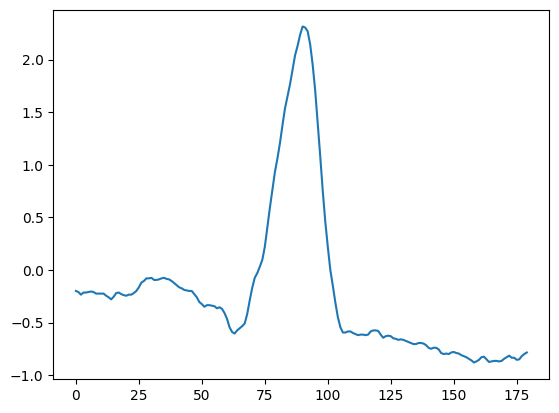

In [ ]:
#Your code here
plt.plot(X[1])

__[QUESTION]__ Check the Y values. For convenience, it's better to handle integer values for the names of the labels.
Use the scikit-learn tool [__LabelEncoder()__](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html) to do that.

You must have this mapping: {'A': 0, 'L': 1, 'N': 2, 'R': 3,  'V': 4}

__[CODE]__

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Your code here
le = LabelEncoder()
le.fit(Y_raw)
list(le.classes_)
Yt=le.transform(Y_raw)
print(Y_raw)
print(Yt)


['A' 'V' 'N' ... 'R' 'L' 'V']
[0 4 2 ... 3 1 4]


## Data visualization

__[QUESTION]__ Plot the average of the samples belonging to the label 0, 1, 2, 3 and 4.

*Option:* Additionally, you can plot the average ECG +/- the standard deviation using the [fill_between](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) method from matplotlib (plt.fill_between(np.linspace(0,180,180), mean - std, mean + std))

__[CODE]__

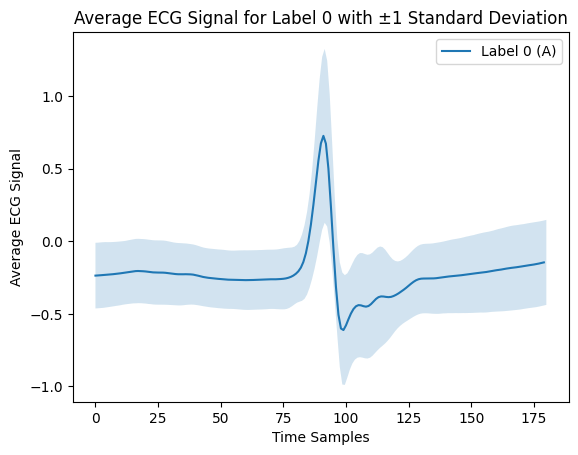

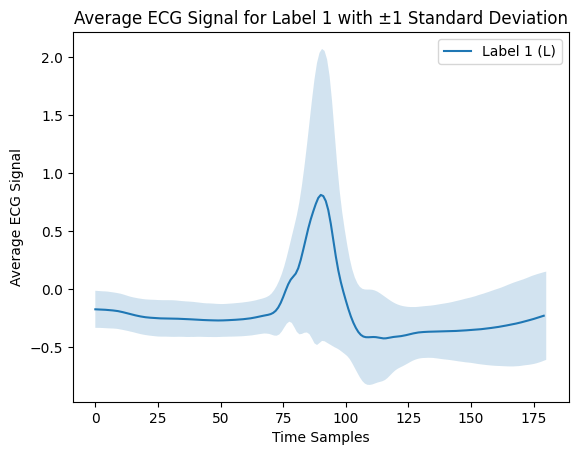

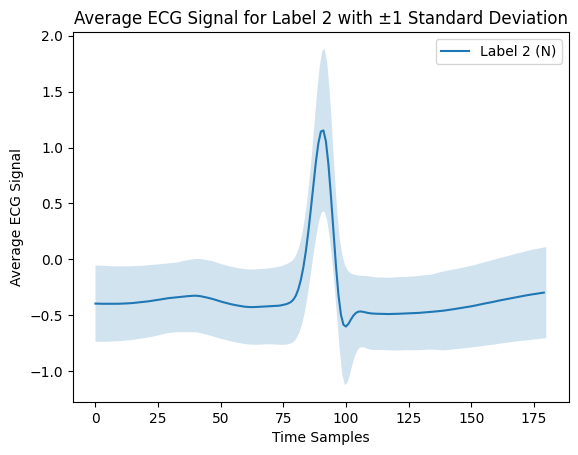

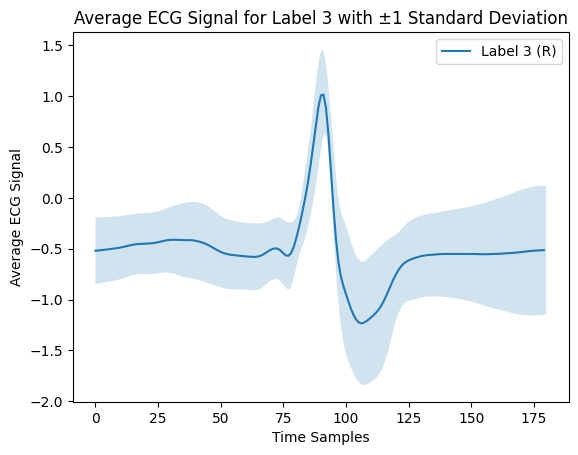

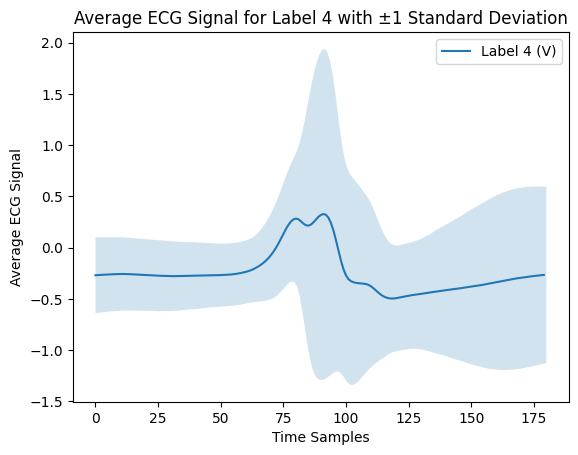

In [ ]:
#Your code here
# Your code here
for i in range(5):

    mean = np.mean(X[Yt == i], axis=0)
    std = np.std(X[Yt == i], axis=0)

    plt.plot(np.mean(X[Yt == i], axis=0), label=f'Label {i} ({le.classes_[i]})')
    # Plot the shaded area representing mean ± standard deviation
    plt.fill_between(np.linspace(0,180,180), mean - std, mean + std,alpha=0.2)

    # Add plot labels and legend
    plt.xlabel('Time Samples')
    plt.ylabel('Average ECG Signal')
    Title = "Average ECG Signal for Label "+str(i)+" with ±1 Standard Deviation"
    plt.title(Title)
    plt.legend()
    plt.show()


## Data normalization

__[QUESTION]__ Why (in Machine Learning) is it usually a good thing to normalize a dataset?

__[ANSWER]__ Normalizing a dataset in machine learning is typically a good practice because it ensures that all features have similar scales, which can significantly impact the performance and convergence of many machine learning algorithms.*



__[QUESTION]__ With the **preprocessing** environment from **sklearn** use the [**StandardScaler()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) to normalize your data. The scaled data will be noted **X_scaled**

__[CODE]__

In [ ]:
from sklearn import preprocessing
#Your code here
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to X and transform it
X_scaled = scaler.fit_transform(X)

# Check the result
print("Mean of X_scaled (should be close to 0):", X_scaled.mean())
print("Standard deviation of X_scaled (should be close to 1):", X_scaled.std())

Mean of X_scaled (should be close to 0): -8.87388927771503e-17
Standard deviation of X_scaled (should be close to 1): 1.0000000000000002


#UNSUPERVISED LEARNING [15 pts]

## [Unsupervised] Principal Component Analysis (PCA) [5 pts]

For this part, we set in an UNSUPERVISED LEARNING context.

__[QUESTION]__ What does it mean in terms of learning objective?


__[ANSWER]__ In the context of unsupervised learning, the learning objective is to identify patterns, structures, or meaningful representations in the data without relying on labeled outputs. For Principal Component Analysis (PCA), this means:

-Reducing the dimensionality of the dataset while retaining as much variance (information) as possible.

-Discovering the most significant directions (principal components) in the data that capture the maximum variance.
The focus is on summarizing and simplifying the data rather than predicting specific outcomes or classes.



__[QUESTION]__ Since we have 180 time samples per ECG, we are working in ℜ^180. We want to project our data in a new space with lower dimensions. For that, we experiment Principal Component Analysis.

1.    Use the [PCA](https://scikit-learn.org/1.5/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) method from sklearn and fit it to your data (**X_scaled**).     
2.    With the attribute *explained_variance_ratio_*  plot the cumulative plot (NB: cummulative sum with numpy is simply _cumsum()_). Add a legend for the X and Y axis.   

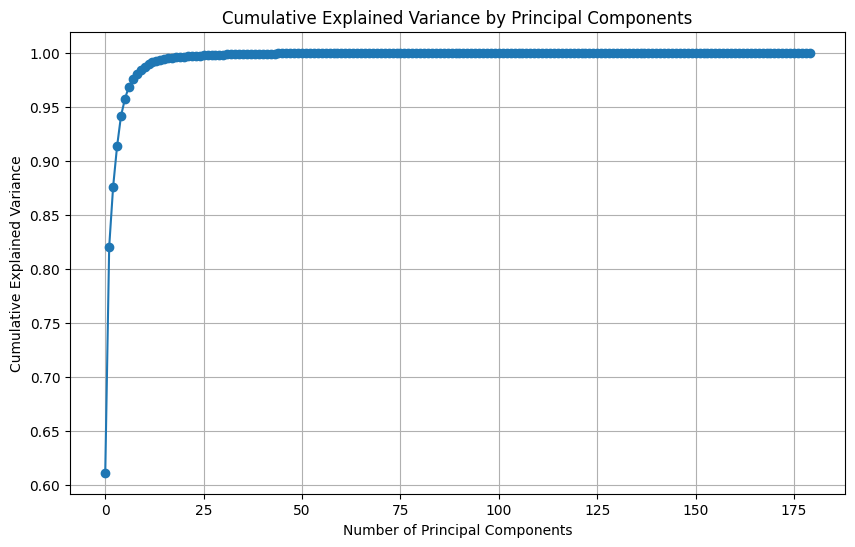

In [ ]:
from sklearn.decomposition import PCA
#Your code here

# Initialize PCA and fit it to the scaled data
pca = PCA()
pca.fit(X_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()


__[QUESTION]__ How many components do we need to keep 95% of the variance of the dataset? (below, we note this value **nb_comp**)



__[ANSWER]__ To keep 95% of the variance of the dataset we need to have *nb_comp=5*



In [ ]:
#Your code here
tab_comp= np.where(cumulative_explained_variance>0.95)
print("To keep 95% of the variance of the dataset we need to have nb_comp =",tab_comp[0][0])


To keep 95% of the variance of the dataset we need to have nb_comp = 5


__[QUESTION]__ Apply the PCA to project your data on a new space composed by **nb_comp** dimensions.

__[CODE]__

In [ ]:
#Your code here

# Set the number of desired components
nb_comp = 5

# Apply PCA
pca = PCA(n_components=nb_comp)
X_pca = pca.fit_transform(X_scaled)

# Check the shape of the transformed data
print(f"Original shape: {X_scaled.shape}")
print(f"Transformed shape: {X_pca.shape}")


Original shape: (10000, 180)
Transformed shape: (10000, 5)


__[QUESTION]__ Take a random sample _x_ from X_scaled. Plot the original _x_ and the one resulting from the PCA with **nb_comp**. Comment your result.

__NB__ Slides 128, 129 from course #1 is really important for this question

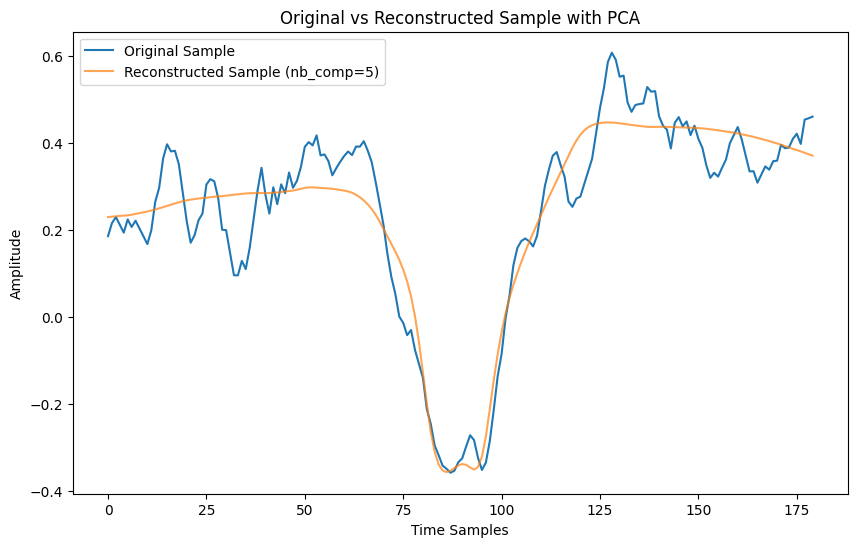

In [ ]:
#Your code here

# Take a random sample from X_scaled
random_index = np.random.randint(0, X_scaled.shape[0])
x_original = X_scaled[random_index]

# Project the sample into the PCA space and reconstruct it
x_pca = pca.transform([x_original])  # Transform the sample into PCA space
x_reconstructed = pca.inverse_transform(x_pca)  # Reconstruct the sample back to original space

# Plot the original and reconstructed signals
plt.figure(figsize=(10, 6))

# Original sample
plt.plot(x_original, label='Original Sample')

# Reconstructed sample
plt.plot(x_reconstructed[0], label=f'Reconstructed Sample (nb_comp={nb_comp})', alpha=0.7)

# Add labels, legend, and title
plt.xlabel('Time Samples')
plt.ylabel('Amplitude')
plt.title('Original vs Reconstructed Sample with PCA')
plt.legend()
plt.show()

__[ANSWER]__

**Comment on the PCA Reconstruction Plot** :
  * The reconstructed signal (orange) captures the main trend of the original signal (blue) but loses fine details and high-frequency fluctuations.
  * Using 5 components, PCA retains significant variations but discards less important features, causing reconstruction errors.
  * Increasing the number of components would improve accuracy but reduce dimensionality reduction benefits.



## [Unsupervised] Clustering (K-MEANS) [10 pts]

Now, we will perform data clustering on our dataset. We will cheat a little bit and fix **K=5** (i.e., the number of labels).

__[QUESTION]__ Why do I say that we are cheating by fixing K=5?


__[ANSWER]__ We are "cheating" because in unsupervised learning, K should be determined without prior knowledge of the true labels. Fixing K=5 uses the fact that we know there are 5 labels that explain 95% of the variance of the dataset, which biases the clustering process.



__[QUESTION]__ Use [Kmeans]() from sklearn with **K=5** and apply (fit) it to your projected data coming from PCA. Each sample belongs to a cluster represented by an id. So the outputs must be a vector of length 10,000 gathering the cluster id of each sample.

__[CODE]__

In [ ]:
from sklearn.cluster import KMeans
np.random.seed(42)
#Your code here

# Initialize KMeans with K=5
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to the projected PCA data
cluster_ids = kmeans.fit_predict(X_pca)

# Check the output
print(f"Cluster IDs shape: {cluster_ids.shape}")  # Should be (10000,)
print(f"First 10 Cluster IDs: {cluster_ids[:10]}")  # Example output of cluster assignments

Cluster IDs shape: (10000,)
First 10 Cluster IDs: [1 0 3 0 1 2 1 0 1 1]


__[QUESTION]__ A (hard) question is: *how good is my clustering?* Obviously, since we cheat and know the labels and fix **K=5**, we expect to have all the samples from the label 'A' in one cluster, all the samples from label 'L' in another one, etc.

To measure how good is my clustering, we have several metrics. We will use the **homogeneity**, **completeness** and **v_measure**. The 3 metrics are implemented in the method [homogeneity_completeness_v_measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html) in sklearn.

Briefly explain what is measured by each metric?

__[ANSWER]__



*   Homogeneity checks if all the samples in each cluster belong to the same true class (i.e., the clusters are "pure").
*   Completeness checks if all the samples of a given true class are assigned to the same cluster.
*   The V-Measure is the harmonic mean of homogeneity and completeness (a value of 1 indicates perfect homogeneity and completeness)





__[QUESTION]__ Compute the metrics for your clustering. Comment.

In [ ]:
from sklearn.metrics import homogeneity_completeness_v_measure
#Your code here

homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(Yt, cluster_ids)

# Print the metrics
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
print(f"V-Measure: {v_measure:.4f}")


Homogeneity: 0.1989
Completeness: 0.2235
V-Measure: 0.2105


__[COMMENT]__ The results show poor clustering performance:

* Homogeneity (0.1989): Clusters are not pure; they mix samples from different classes.
* Completeness (0.2235): Classes are fragmented across multiple clusters.
* V-Measure (0.2105): Overall clustering poorly aligns with the true labels.



__[QUESTION]__ Project your original data (**X_scaled**) with a PCA with *n_components = 2*. then, apply again your KMeans on this 2-D dataset and compute the metrics.

In [ ]:
# Step 1: Apply PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

np.random.seed(42)

# Step 2: Apply KMeans with K=5
kmeans_2d = KMeans(n_clusters=5, random_state=42)
cluster_ids_2d = kmeans_2d.fit_predict(X_pca_2d)

# Step 3: Compute clustering metrics
homogeneity_2d, completeness_2d, v_measure_2d = homogeneity_completeness_v_measure(Yt, cluster_ids_2d)

# Print results
print(f"Homogeneity (2D): {homogeneity_2d:.4f}")
print(f"Completeness (2D): {completeness_2d:.4f}")
print(f"V-Measure (2D): {v_measure_2d:.4f}")


Homogeneity (2D): 0.1775
Completeness (2D): 0.2088
V-Measure (2D): 0.1919


__[QUESTION]__ Plot your 2-D dataset in a graph by labelling the data with the exact ECG label (i.e., your Y). Make a second plot by labelling the data with the id of the cluster. An easy way is to use the Matplotlib method [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) (use: marker='o',alpha=0.5,edgecolors='black')

Comment (i.e., does what you see with this 2-D representation explain your result with the previous metrics?).

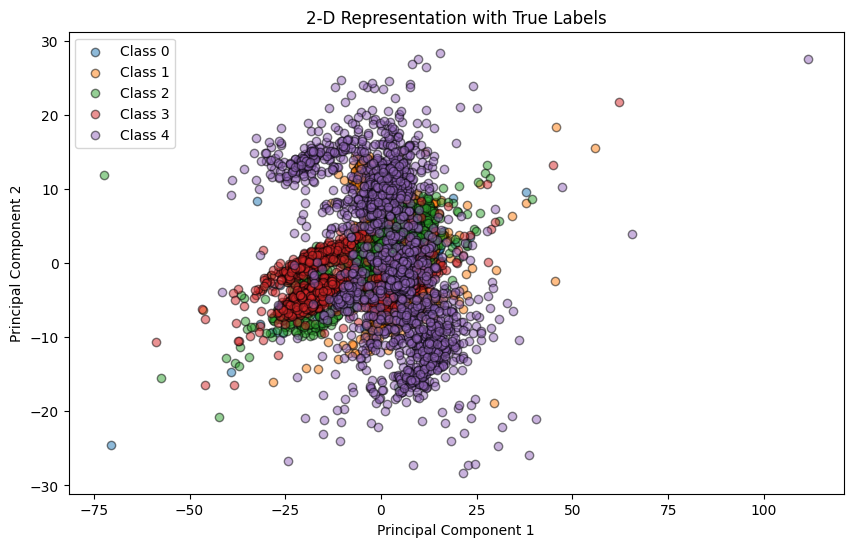

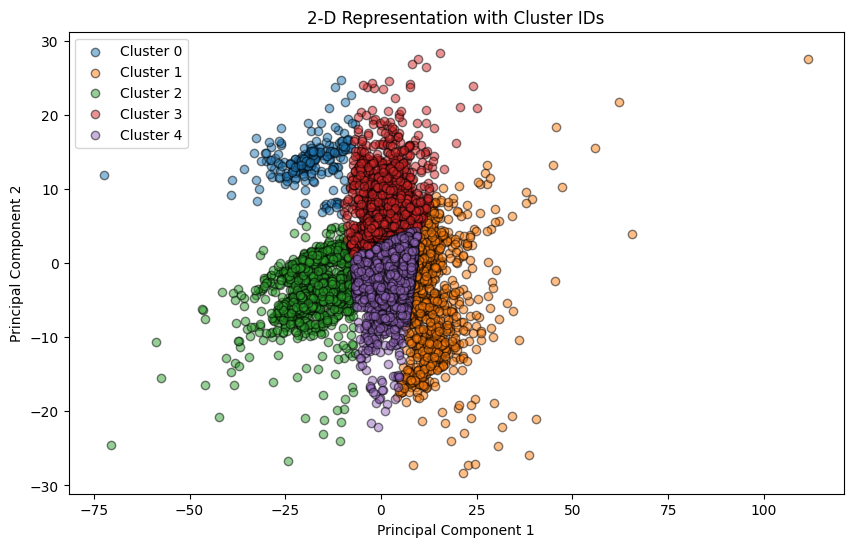

In [ ]:
# Your code here

# Scatter plot with true labels (Yt)
plt.figure(figsize=(10, 6))
for label in range(5):  # Assuming 5 labels
    plt.scatter(
        X_pca_2d[Yt == label, 0],
        X_pca_2d[Yt == label, 1],
        label=f'Class {label}',
        marker='o',
        alpha=0.5,
        edgecolors='black'
    )
plt.title('2-D Representation with True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Scatter plot with cluster IDs
plt.figure(figsize=(10, 6))
for cluster in range(5):  # Assuming 5 clusters
    plt.scatter(
        X_pca_2d[cluster_ids_2d == cluster, 0],
        X_pca_2d[cluster_ids_2d == cluster, 1],
        label=f'Cluster {cluster}',
        marker='o',
        alpha=0.5,
        edgecolors='black'
    )
plt.title('2-D Representation with Cluster IDs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


__[COMMENT]__
* Overall, the lack of clear boundaries between classes in the 2-D Representation with True Labels aligns with the low homogeneity and completeness metrics observed earlier.
* The PCA-reduced 2-D space does not effectively separate all true classes, making it challenging for KMeans to form clusters that align with the true labels.
* The distinct cluster boundaries in the second plot highlight how KMeans groups data based solely on the reduced 2-D features, ignoring true class separability.
* These observations explain the low metrics for homogeneity, completeness, and V-measure, as the clustering does not strongly align with the true labels.



#SUPERVISED LEARNING [17 pts]

## [Supervised] Logistic Regression [5 pts]

Now, we set in a **SUPERVISED LEARNING** context and aim to perform a CLASSIFICATION TASK. We will build and train several **models**. After training, the goal of a **model** is to take a ECG input *x* and provide the probabilities that this *x* belongs to our 5 labels (*Y*).  

__[QUESTION]__ Formally, what is the learning goal of our models?

__[ANSWER]__
* In the supervised learning context, the learning goal of the models is to approximate a function f(x) that maps the input data x (ECG signals) to the probabilities of belonging to each of the 5 labels in Y (the true classes).
* The model must learn to maximize the likelihood of the true labels Y, ensuring that the predicted probabilities are as close as possible to the true distribution of the data.



__[QUESTION]__ Before implementing supervised ML models, we need to split our dataset (X,Y) into a TRAIN (Xtrain, Ytrain) dataset and a TEST (Xtest, Ytest) dataset. Why ?  

__[ANSWER]__ Splitting the dataset is necessary to assess the generalization ability of the model, which is the ultimate goal in machine learning. It ensures the model performs well on unseen data and avoids overfitting.



__[QUESTION]__ Use the SKLEARN method [train_test_split]() applied on your X_scaled dataset. Use test_size=0.30 and random_state=42. Check the size of the resulting (X_train, y_train, X_test, y_test).

In [ ]:
from sklearn.model_selection import train_test_split
#Your code here

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Yt, test_size=0.30, random_state=42)

# Check the sizes of the resulting datasets
print(f"Size of X_train: {X_train.shape}")
print(f"Size of y_train: {y_train.shape}")
print(f"Size of X_test: {X_test.shape}")
print(f"Size of y_test: {y_test.shape}")


Size of X_train: (7000, 180)
Size of y_train: (7000,)
Size of X_test: (3000, 180)
Size of y_test: (3000,)


__[QUESTION]__ The first model we will implement is a **LOGISTIC REGRESSION** model. Remember that this model is a very simple **LINEAR** model. You will use the [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) from SKLEARN.

1.  Define a LogisticRegression model
2.  Apply it to your training data (*fit* method)
3.  Compute the predictions on your test data (*prediction* method)
4.  Compute the accuracy on both the training and the test datasets (*score* method)
5.  Compute the [confusion_matrix](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html) on the test set
6.  [Display](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay) your confusion matrix


Training Accuracy: 0.8433
Test Accuracy: 0.8290


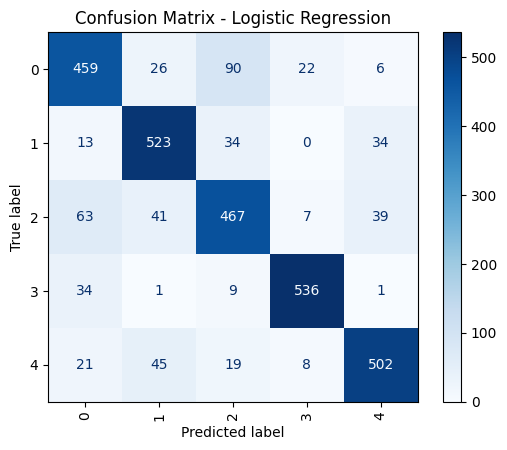

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Your code here
#NB: you can set max_iter=10000 when you define your LogisticRegression

# Step 1: Define and train the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=10000)
logreg.fit(X_train, y_train)

# Step 2: Compute predictions on the test set
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Step 3: Compute accuracy on the training and test datasets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 4: Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg.classes_)
disp.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## [Supervised] Gaussian Naive Bayes Classifier [4 pts]


__[QUESTION]__ The second model we will implement is a **GAUSSIAN NAIVE BAYES CLASSIFIER** model. You will use the [GaussianNB](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html) from SKLEARN.

Do exactly the same 6 steps seen before for the logistic regression.

__[QUESTION]__ What is the main difference - in terms of LEARNING OBJECTIVE - for the Gaussian Naive Bayes model?

**[ANSWER]**
* Logistic Regression: Directly optimizes the decision boundary for P(Y|X).
* Gaussian Naive Bayes: First estimates P(X|Y) and P(Y), then calculates P(Y|X) using Bayes' Theorem. It assumes conditional independence of features and Gaussian distributions for P(X|Y).









Training Accuracy (GaussianNB): 0.5559
Test Accuracy (GaussianNB): 0.5507


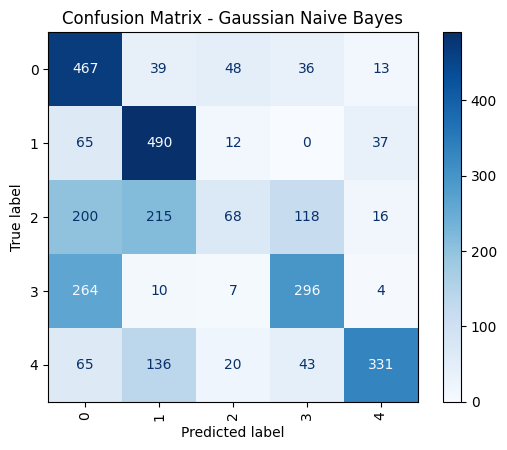

In [ ]:
from sklearn.naive_bayes import GaussianNB
#Your code here

# Step 1: Define and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 2: Compute predictions on the test set
y_train_pred_gnb = gnb.predict(X_train)
y_test_pred_gnb = gnb.predict(X_test)

# Step 3: Compute accuracy on the training and test datasets
train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)
test_accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)

print(f"Training Accuracy (GaussianNB): {train_accuracy_gnb:.4f}")
print(f"Test Accuracy (GaussianNB): {test_accuracy_gnb:.4f}")

# Step 4: Compute and display the confusion matrix
conf_matrix_gnb = confusion_matrix(y_test, y_test_pred_gnb)

# Display the confusion matrix using ConfusionMatrixDisplay
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gnb, display_labels=gnb.classes_)
disp_gnb.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()



## [Supervised] SVM [5 pts]



__[QUESTION]__ The third model we will implement is a **SUPPORT VECTOR MACHINE (SVM)** model. You will use [SVC](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from SKLEARN.

Do exactly the same 6 steps seen before two times:
1.   With the 'rbf' kernel (i.e., the Gaussian kernel. It's the default value of the *kernel* parameter)
2.   With the 'linear' kernel

Training Accuracy (SVM rbf): 0.9284
Test Accuracy (SVM rbf): 0.9180
Training Accuracy (SVM linear): 0.8996
Test Accuracy (SVM linear): 0.8760


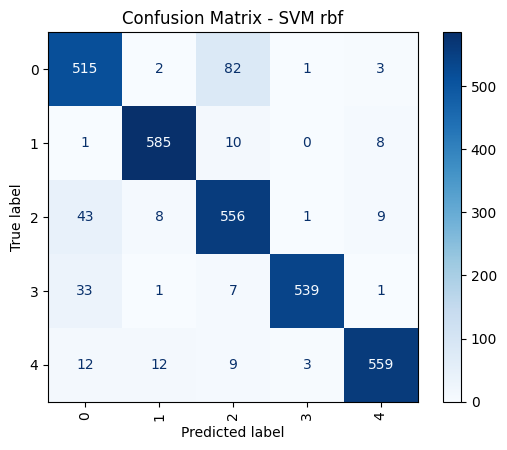

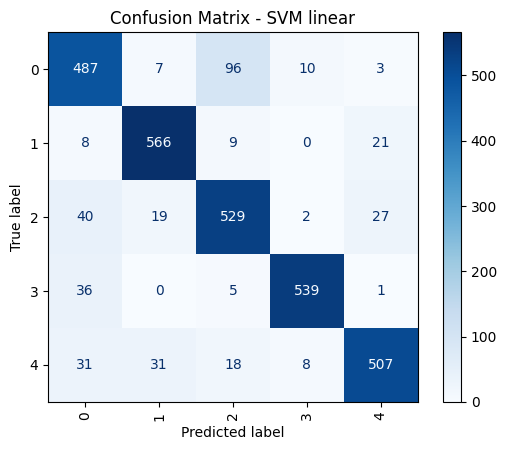

In [ ]:
from sklearn.svm import SVC
#Your code here

# Step 1: Define and train the Gaussian Naive Bayes model
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Step 2: Compute predictions on the test set
y_train_pred_rbf = svm_rbf.predict(X_train)
y_test_pred_rbf = svm_rbf.predict(X_test)

y_train_pred_linear = svm_linear.predict(X_train)
y_test_pred_linear = svm_linear.predict(X_test)

# Step 3: Compute accuracy on the training and test datasets
train_accuracy_rbf = accuracy_score(y_train, y_train_pred_rbf)
test_accuracy_rbf = accuracy_score(y_test, y_test_pred_rbf)

train_accuracy_linear = accuracy_score(y_train, y_train_pred_linear)
test_accuracy_linear = accuracy_score(y_test, y_test_pred_linear)

print(f"Training Accuracy (SVM rbf): {train_accuracy_rbf:.4f}")
print(f"Test Accuracy (SVM rbf): {test_accuracy_rbf:.4f}")

print(f"Training Accuracy (SVM linear): {train_accuracy_linear:.4f}")
print(f"Test Accuracy (SVM linear): {test_accuracy_linear:.4f}")

# Step 4: Compute and display the confusion matrix
conf_matrix_rbf = confusion_matrix(y_test, y_test_pred_rbf)
conf_matrix_linear = confusion_matrix(y_test, y_test_pred_linear)

# Display the confusion matrix using ConfusionMatrixDisplay
disp_svm_rbf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf, display_labels=svm_rbf.classes_)
disp_svm_rbf.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix - SVM rbf")
plt.show()

disp_svm_linear = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_linear, display_labels=svm_linear.classes_)
disp_svm_linear.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix - SVM linear")
plt.show()

__[QUESTION]__ Comment the results you obtained with these models. [3 pts]

**[ANSWER]**
* Logistic Regression:
  * Training Accuracy: 84.33%, Test Accuracy: 82.90%
  * Performs decently but struggles with overlapping classes, as shown by moderate misclassifications in the confusion matrix. ( Class 2 (true label) is often misclassified as Class 0 and Class 4 also has moderate misclassifications as Class 1 and 2)
* Gaussian Naive Bayes:
  * Training Accuracy: 55.59%, Test Accuracy: 55.07%
  * Performs poorly due to unrealistic feature independence and Gaussian assumptions, leading to widespread misclassifications. (Class 2 and Class 3 are heavily confused with other classes. )
* Support Vector Machine linear (SVM linear):
  * Training Accuracy: 89.96%, Test Accuracy: 87.60%
  * Performs well but slightly worse than RBF due to limitations with non-linear boundaries.
* Support Vector Machine rbf (SVM rbf):
  * Training Accuracy: 92.84%, Test Accuracy: 91.80%
  * Best performance, effectively handles complex patterns with minimal misclassifications.

To conclude, SVM with the rbf kernel is the best model, achieving the highest accuracy and robustly handling class overlap, while SVM with the linear kernel is slightly worse due to limitations with non-linear boundaries. Whereas Gaussian Naive Bayes is unsuitable for this task. And Logistic Regression is decent but less effective for complex relationships.



# BONUS

__[QUESTION]__ The bonus model we will implement is a **DECISION TREE** model. We will use (https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from SKLEARN.TREE.

We will do exactly the same 6 steps seen before.

Training Accuracy (Decision Tree (Classifier)): 1.0000
Test Accuracy (Decision Tree (Classifier)): 0.8767


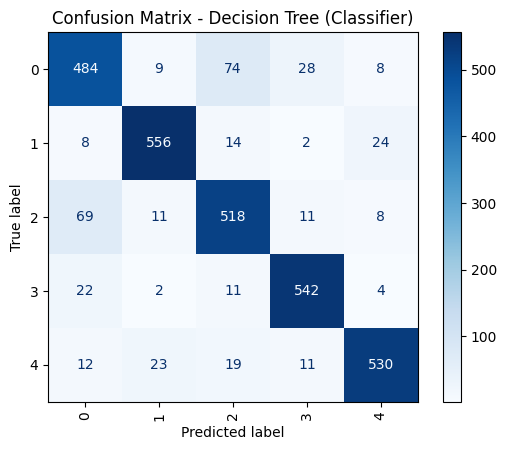

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Your code here

# Step 1: Define and train the Gaussian Naive Bayes model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Step 2: Compute predictions on the test set
y_train_pred_dtree = dtree.predict(X_train)
y_test_pred_dtree = dtree.predict(X_test)

# Step 3: Compute accuracy on the training and test datasets
train_accuracy_dtree = accuracy_score(y_train, y_train_pred_dtree)
test_accuracy_dtree = accuracy_score(y_test, y_test_pred_dtree)

print(f"Training Accuracy (Decision Tree (Classifier)): {train_accuracy_dtree:.4f}")
print(f"Test Accuracy (Decision Tree (Classifier)): {test_accuracy_dtree:.4f}")

# Step 4: Compute and display the confusion matrix
conf_matrix_dtree = confusion_matrix(y_test, y_test_pred_dtree)

# Display the confusion matrix using ConfusionMatrixDisplay
disp_dtree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dtree, display_labels=dtree.classes_)
disp_dtree.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix - Decision Tree (Classifier)")
plt.show()

**[ANSWER]**
* Decision Tree (Classifier) :
  * Training Accuracy: 100.00%, Test Accuracy: 87.67%
  * Analysis: The Decision Tree perfectly fits the training data (100% accuracy), indicating it fully memorized the training set. The test accuracy (87.67%) is significantly lower than the training accuracy, suggesting overfitting. The tree may have memorized noise or specific details in the training set that do not generalize well to unseen data.
  * Comparison: Test accuracy is comparable to the SVM with the linear kernel (87.60%) but is lower than the SVM with the RBF kernel (91.80%). Overfitting is evident as SVM models (especially RBF) maintain a smaller gap between training and test accuracies.

To summarize, while Decision Trees achieve good test performance, overfitting is a concern. Regularization techniques can help improve generalization. SVM with the RBF kernel remains the best performer.

__[QUESTION]__ The second bonus model we will implement is a **SUPPORT VECTOR MACHINE (SVM)** model with the polynomial kernel this time. To know if there are polynomial relationships in the data.

We will do exactly the same 6 steps seen before.

Training Accuracy (SVM polynomial): 0.7787
Test Accuracy (SVM polynomial): 0.7450


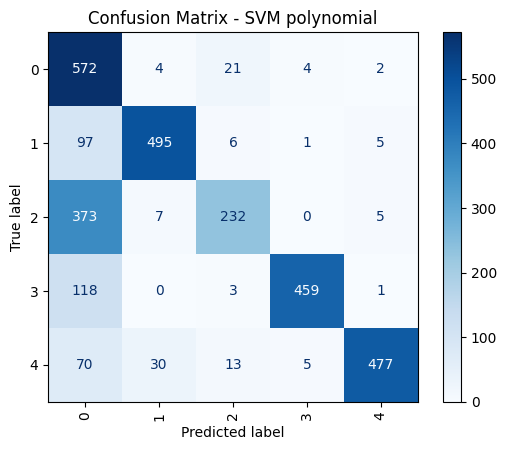

In [ ]:
#Your code here

# Step 1: Define and train the Gaussian Naive Bayes model
svm_poly = SVC(kernel='poly', random_state=42)
svm_poly.fit(X_train, y_train)

# Step 2: Compute predictions on the test set
y_train_pred_poly = svm_poly.predict(X_train)
y_test_pred_poly = svm_poly.predict(X_test)

# Step 3: Compute accuracy on the training and test datasets
train_accuracy_poly = accuracy_score(y_train, y_train_pred_poly)
test_accuracy_poly = accuracy_score(y_test, y_test_pred_poly)

print(f"Training Accuracy (SVM polynomial): {train_accuracy_poly:.4f}")
print(f"Test Accuracy (SVM polynomial): {test_accuracy_poly:.4f}")

# Step 4: Compute and display the confusion matrix
conf_matrix_poly = confusion_matrix(y_test, y_test_pred_poly)

# Display the confusion matrix using ConfusionMatrixDisplay
disp_svm_poly = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_poly, display_labels=svm_poly.classes_)
disp_svm_poly.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix - SVM polynomial")
plt.show()

**[ANSWER]**
* SVM (Polynomial Kernel) :
  * Training Accuracy: 77.87%, Test Accuracy: 74.50%
  * Analysis: The polynomial kernel achieves significantly lower accuracy compared to the SVM with RBF or linear kernels. The confusion matrix shows that Class 2 suffers from the most misclassifications, often being predicted as Class 0. The lower training accuracy indicates that the polynomial kernel struggles to fit the training data effectively, likely due to insufficient flexibility or improper degree settings.

To summarize, the polynomial kernel is not suitable for this task, as it fails to generalize well and performs worse than RBF and linear kernels..

__[QUESTION]__ The third bonus model we will use is our current best model to perform our task : **SUPPORT VECTOR MACHINE (SVM) model with the rbf kernel **. We will modify the C value in our model, which is the regularization parameter in SVM.

We will do exactly the same 6 steps seen before. We also need to know that :
* **Low C** : Allows a larger margin by tolerating some misclassifications. It prioritizes generalization over fitting the training data.
* **High C** : Tries to minimize misclassification on the training set, leading to a smaller margin and a higher risk of overfitting.

Best C: 100
Best Cross-Validation Accuracy: 0.9616
Training Accuracy (SVM rbf with C=100): 0.9884
Test Accuracy (SVM rbf with C=100): 0.9617


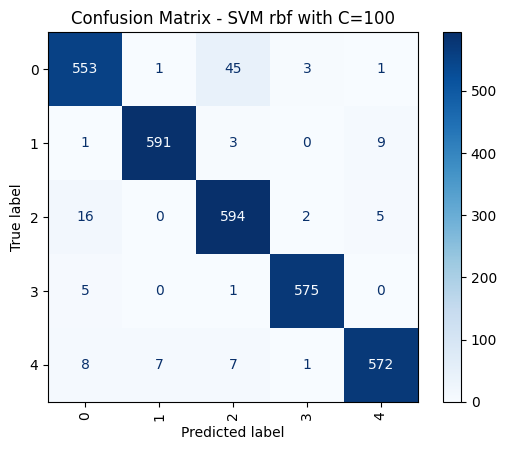

In [ ]:
from sklearn.model_selection import GridSearchCV
#Your code here

# Step 1: Define a range of C values to test
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Step 2: Set up the SVM model with GridSearchCV
svm_rbf = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, cv=5, scoring='accuracy') #cv=5 implies that the dataset is split into 5-folds
grid_search.fit(X_train, y_train)

# Step 3: Retrieve the best C value
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Step 4: Train the final SVM model with the best C
svm_rbf_best = SVC(kernel='rbf', C=best_C, random_state=42)
svm_rbf_best.fit(X_train, y_train)

# Step 5: Compute predictions on the test set
y_train_pred_rbf = svm_rbf_best.predict(X_train)
y_test_pred_rbf = svm_rbf_best.predict(X_test)

# Step 6: Compute accuracy on the training and test datasets
train_accuracy_rbf = accuracy_score(y_train, y_train_pred_rbf)
test_accuracy_rbf = accuracy_score(y_test, y_test_pred_rbf)

print(f"Training Accuracy (SVM rbf with C={best_C}): {train_accuracy_rbf:.4f}")
print(f"Test Accuracy (SVM rbf with C={best_C}): {test_accuracy_rbf:.4f}")

# Step 7: Compute and display the confusion matrix
conf_matrix_rbf = confusion_matrix(y_test, y_test_pred_rbf)

# Display the confusion matrix using ConfusionMatrixDisplay
disp_svm_rbf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf, display_labels=svm_rbf_best.classes_)
disp_svm_rbf.plot(cmap="Blues", xticks_rotation='vertical')
plt.title(f"Confusion Matrix - SVM rbf with C={best_C}")
plt.show()


**[ANSWER]**
* SVM (rbf Kernel) with C=100 and 5-fold cross validation:
  * Cross-Validation Accuracy: 96.16%, Training Accuracy: 98.84%, Test Accuracy: 96.17%
  * Excellent performance with minimal misclassifications in the confusion matrix.
  * The high C value (100) effectively balances training accuracy and generalization.
Conclusion: This is the best model so far, achieving the best accuracy and generalization.